## Mini Project 3

### Will Fairman 03/19/21 

Designing a single-stage differential amplifier circuit comprising of a PMOS diff-pair, a low voltage cascode current mirror, and two pairs of NMOS transistors in a folded cascode arrangement.

The repository containing my files for this project can be found here: https://github.com/wFairmanOlin/MADVLSI/tree/master/mini_proj_3

### Grok the Circuit


#### Which input voltage is the noninverting input? Which is the inverting input? Explaing your reasoning briefly.

$V_1$ is the non-inverting input while $V_2$ is the inverting input. When $V_2$ is driven low, the current $I_2$ increases (because $M_2$ is a pmos transistor) causing the voltage at the source of $M_6$ to increase. A reduced $V_{ds}$ across the nmos $M_6$ causes the current through $M_6$ to decrease. Due to KCL, $I_{out} = I_{m10} - I_{m6}$. Because $V_1$ remains the same, $I_{m10}$ remains the same: leaving $I_{out}$ and subsequently $V_{out}$ to increase. Conversely, when $V_2$ is driven high, the current through $M_6$ increases: causing $I_{out}$ and $V_{out}$ to decrease. 

#### What is the allowable common-mode input voltage range of this circuit?  Explain your reasoning.

The common mode input voltage is equal to $(V_1 + V_2)/2$. The range of the common-mode voltage is based on keeping $M_b$ in saturation.If $M_b$ is in saturation, the relationship between $V_{ds}$ and $V_{1,2}$ is $V_{ds} = k(V_{1,2} - V_b)$. Therefore $V_{1,2} > V_{sdsat}/k + V_b$.

#### If the output voltage were fixed by a voltage source somewhere in the middle ofthe  rails,  what  would  be  the  output  current  in  terms  of I1 and I2 if  the  Early effect were negligible?

When $V_{out}$ is fixed, $I_{out} = I_2 - I_1$. 

#### Do we need to make the bias current sunk by M3 and M4 equal to the diff-pair bias current,Ib?  If so, explain why.  If not, what constraints exist on this currentlevel with respect toIb?

Ideally the bias current sunk by $M_3$ and $M_4$ should be equal to $I_b$. If the current sunk was larger than $I_b$ the circuit should still behavior similarly up to a limit where the current is so large that current through the cascode transistors is maxed out and $I_{out}$ stops responsding to changes in $I_2$ and $I_1$. Similarly, if the current is too small, the $V_{ds}$ across the cascode voltages will be so small that the current flowing through them will approach $0A$ causing $I_{out}$ to drop to $0A$ and no longer respond to changes in $V_1$ or $V_2$.

### Schematic Capture and Simulation

#### Voltage Transfer Characteristics


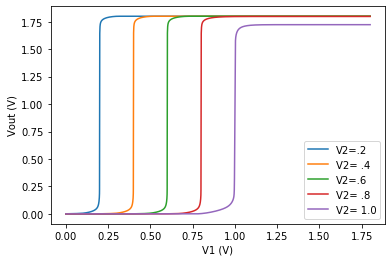

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

vout = pd.read_csv("data/diff_2a.txt", sep=" +", engine='python')

#plot VTC curvers
vout.plot("vsweep", ["v1", "v2", "v3", "v4", "v5"])
plt.xlabel("V1 (V)")
plt.ylabel("Vout (V)")
plt.legend(["V2=.2", "V2= .4", "V2=.6", "V2= .8", "V2= 1.0"])
plt.show()

gain v1:  1525.112863216837
gain v2:  1514.499295978832
gain v3:  1501.1661565035463
gain v4:  1445.425747167059
gain v5:  205.8942774543439


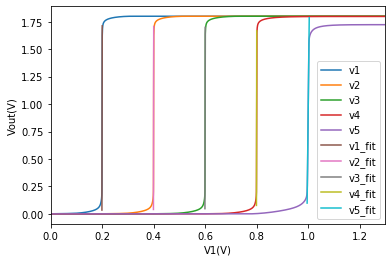

In [3]:
# Calculating DC gain for VTC curves
for i in range(1,6):
    x = vout["vsweep"].loc[(vout["v" + str(i)] > .2) & (vout["v" + str(i)] < 1.6)]
    y = vout["v" + str(i)].loc[(vout["v" + str(i)] > .2) & (vout["v" + str(i)] < 1.6)]
    v_fit = np.polyfit(x,y, 1)
    vout["v" + str(i) + "_fit"] = x * v_fit[0] + v_fit[1]
    print("gain v" + str(i) +": ", v_fit[0])

#plot
vout.plot("vsweep", ["v1", "v2", "v3", "v4", "v5", "v1_fit", "v2_fit", "v3_fit", "v4_fit", "v5_fit"], xlim=(0,1.3))
plt.xlabel("V1(V)")
plt.ylabel("Vout(V)")
plt.show()

#### Voltage to Current Transfer Characteristics

transconductance (g):  1.1754080716098113e-05
initial current:  -1.30456836e-06
final current:  1.30525259e-06


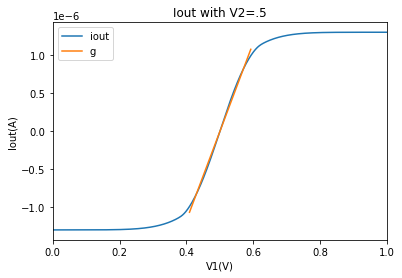

In [89]:
#read csv
vout = pd.read_csv("data/diff_2b.txt", sep=" +", engine="python")

#calculate transconductance
x = vout["v1"].loc[(vout["iout"] > -1e-6) & (vout["iout"] < 1e-6)]
y = vout["iout"].loc[(vout["iout"] > -1e-6) & (vout["iout"] < 1e-6)]
g_fit = np.polyfit(x,y, 1)
vout["g"] = x * g_fit[0] + g_fit[1]
print("transconductance (g): ", g_fit[0])

#print initial, final current
print("initial current: ", vout["iout"].iloc[0])
print("final current: ", vout["iout"].iloc[-1])

#plot
vout.plot("v1", ["iout", "g"],  xlim=(0,1))
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.xlabel("V1(V)")
plt.ylabel("Iout(A)")
plt.title("Iout with V2=.5")
plt.show()

The limiting values of the output current are slightly less than my ib current of 1.5e-6 with values of +- 1.3e-6

#### Loopgain

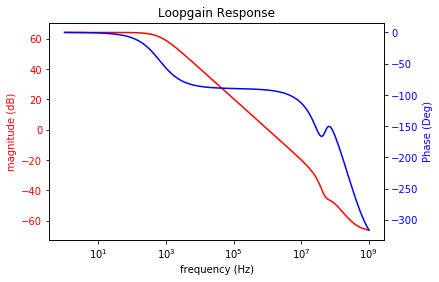

In [230]:
#read csv
vout = pd.read_csv("data/diff_2c.txt", sep=" +", engine="python")

#plot mag and phase
fig, ax1 = plt.subplots()

ax1.set_ylabel("magnitude (dB)", color="red")
ax1.tick_params(axis='y', labelcolor="red")
ax1.set_xlabel("frequency (Hz)")
ax1.set_xscale("log")
ax1.plot(vout.freq, vout.mag, color="red")

ax2 = ax1.twinx()
ax2.set_ylabel("Phase (Deg)", color="blue")
ax2.tick_params(axis='y', labelcolor="blue")
ax2.plot(vout.freq, vout.phase, color="blue")

plt.title("Loopgain Response")
plt.show()

In [227]:
#print dc gain

print("gain at 1Hz: ", vout["real"].iloc[0])
# print(np.power(10, vout.mag[0]/20))

#Calculate Unity Gain Crossover Freq

#From Graph
min_mag = abs(vout["mag"]).min()
min_freq = vout["freq"].loc[vout["mag"] == min_mag]
print("crossover freq graph: ", min_freq.iloc[0])

#From Transconductance
c = 2e-12
tau = c / g_fit[0]
print("tau: ", tau)
crossover_freq = 1/tau/(2*np.pi)
print("crossover freq g,c: ", crossover_freq)

gain at 1Hz:  1611.04698
crossover freq graph:  1000000.0
tau:  1.7015367243997626e-07
crossover freq g,c:  935360.0237340698


The print statement above shows the expected crossover frequency versus the calculated crossover frequency.

#### Unity-Gain Follower Frequency Response

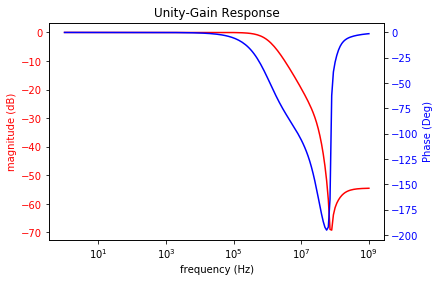

In [181]:
#read csv
vout = pd.read_csv("data/diff_2d.txt", sep=" +", engine="python")

#plot mag and phase
fig, ax1 = plt.subplots()

ax1.set_ylabel("magnitude (dB)", color="red")
ax1.tick_params(axis='y', labelcolor="red")
ax1.set_xlabel("frequency (Hz)")
ax1.set_xscale("log")
ax1.plot(vout.freq, vout.mag, color="red")

ax2 = ax1.twinx()
ax2.set_ylabel("Phase (Deg)", color="blue")
ax2.tick_params(axis='y', labelcolor="blue")
ax2.plot(vout.freq, vout.phase, color="blue")

plt.title("Unity-Gain Response")
plt.show()

The corner frequency appears to be around $10^6$ which is expected from our previous calculations.

#### Small-Signal Step Response

tau 1:  1.6178e-07
tau 2:  1.6178e-07


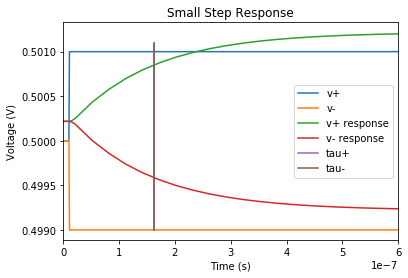

In [253]:
#read csv
vout = pd.read_csv("data/diff_2e.txt", sep=" +", engine="python")
# print(vout.tail())

#calculate time constant
vstart1 = vout["vout1"].iloc[0]
vfinal1 = vout["vout1"].iloc[-1]
vout["tau_dist1"] = abs(vout["vout1"]-(vfinal1 - (vfinal1-vstart1)/np.e))
tau1 = vout["time"].loc[vout["tau_dist1"] == vout["tau_dist1"].min()]
tau1 = tau1.iloc[0] - 1.01e-8 #start of step response
print("tau 1: ", tau1)
vstart2 = vout["vout2"].iloc[0]
vfinal2 = vout["vout2"].iloc[-1]
vout["tau_dist2"] = abs(vout["vout2"]-(vfinal2 - (vfinal2-vstart2)/np.e))
tau2 = vout["time"].loc[vout["tau_dist2"] == vout["tau_dist2"].min()]
tau2 = tau2.iloc[0] - 1.01e-8 #start of step response
print("tau 2: ", tau2)

#plot
vout.plot("time", ["vin1","vin2","vout1","vout2"], xlim=(0, .6e-6))
plt.plot([tau1, tau1], [.499, .5011])
plt.plot([tau2, tau2], [.499, .5011])
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.legend(["v+", "v-", "v+ response", "v- response", "tau+", "tau-"])
plt.xlabel("Time (s)")
plt.ylabel("Voltage (V)")
plt.title("Small Step Response")
plt.show()

- My choice of a 1e-6V step change was mainly qualitative but came out of a balance of keeping $V_1$ close to $V_2$ while still being able to measure a response in $V_{out}$.
- The response is mainly symmetrical but $V_{out}$ is offset from $V_2$ by roughly $.0025V$.
- The response is not linear and exhibits the characteristics of a first order differential equation.
- The time constants for the rising and falling step responses are identical. They are also similar to the time constant calculated in the loop-gain question. 

#### Large-Amplitude Step Response

tau 1:  5.35521955e-07
tau 2:  4.15521955e-07


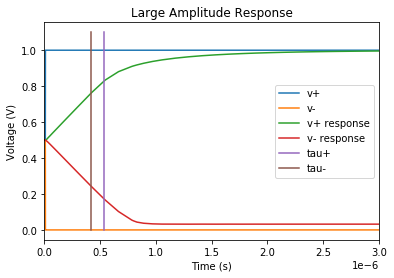

In [255]:
#read csv
vout = pd.read_csv("data/diff_2f.txt", sep=" +", engine="python")
# print(vout.tail())

#calculate time constant
vstart1 = vout["vout1"].iloc[0]
vfinal1 = vout["vout1"].iloc[-1]
vout["tau_dist1"] = abs(vout["vout1"]-(vfinal1 - (vfinal1-vstart1)/np.e))
tau1 = vout["time"].loc[vout["tau_dist1"] == vout["tau_dist1"].min()]
tau1 = tau1.iloc[0] - 1.01e-8 #start of step response
print("tau 1: ", tau1)
vstart2 = vout["vout2"].iloc[0]
vfinal2 = vout["vout2"].iloc[-1]
vout["tau_dist2"] = abs(vout["vout2"]-(vfinal2 - (vfinal2-vstart2)/np.e))
tau2 = vout["time"].loc[vout["tau_dist2"] == vout["tau_dist2"].min()]
tau2 = tau2.iloc[0] - 1.01e-8 #start of step response
print("tau 2: ", tau2)

#plot
vout.plot("time", ["vin1","vin2","vout1","vout2"], xlim=(0,3e-6))
plt.plot([tau1, tau1], [0, 1.1])
plt.plot([tau2, tau2], [0, 1.1])
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.legend(["v+", "v-", "v+ response", "v- response", "tau+", "tau-"])
plt.xlabel("Time (s)")
plt.ylabel("Voltage (V)")
plt.title("Large Amplitude Response")
plt.show()

slew for v+:  603950.999002679
slew for v-:  -617033.7088688138
theoretical slew rate:  650000.0


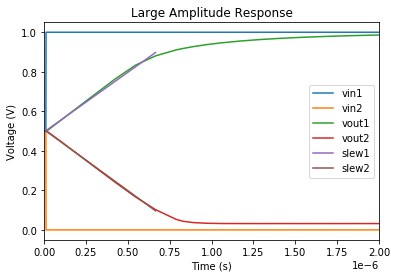

In [256]:
#slew rate from graph
x = vout["time"].loc[(vout["vout1"] > .5) & (vout["vout1"] < .9)]
y = vout["vout1"].loc[(vout["vout1"] > .5) & (vout["vout1"] < .9)]
slew = np.polyfit(x,y, 1)
vout["slew1"] = x * slew[0] + slew[1]
print("slew for v+: ", slew[0])

x = vout["time"].loc[(vout["vout2"] < .5) & (vout["vout2"] > .1)]
y = vout["vout2"].loc[(vout["vout2"] < .5) & (vout["vout2"] > .1)]
slew = np.polyfit(x,y, 1)
vout["slew2"] = x * slew[0] + slew[1]
print("slew for v-: ", slew[0])

#theoretical slew rate 
c = 2e-12
ib = 1.3e-6
print("theoretical slew rate: ", ib/c)

vout.plot("time", ["vin1","vin2","vout1","vout2", "slew1", "slew2"], xlim=(0,2e-6))
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.xlabel("Time (s)")
plt.ylabel("Voltage (V)")
plt.title("Large Amplitude Response")
plt.show()

- The response to $V_1 = 0$ has a larger slew rate than the response to $V_1 = 1$. $V_{out}$ also does not fully settle to $0V$ when $V_1 = 0$.
- The slew rates are slightly lower than the theoretical slew rate given the current measured in part b and the capacitance on $V_{out}$. This is most likely due to the line of best fit incorporating some of the non-linear region of the voltage response.

### Layout Design
The following layouts passed lvs. The `comp.out` files can be found in the `mini_proj_3` folder.

#### Folded Cascode Differential Amplifier
To achieve an effective size of 12u wide by .5u long, I made each transistor symbol with dimensions of 6u wide by .5u and doubled the amount of transistors in my circuit to achieve a similar strength ratio. By breaking the unit transistor into two sub-unit transistors, I was also able to make my design symmetrical in order to reduce variations due to manufacturing defects or external sources that could affect indvidual transistor characteristics. I also added dummy transistors to the circuit so that each transistor would have similar boundaries.

##### Layout Driven Schematic
<img src="img/diff_amp_sch.png" width="1000" />

##### Layout
<img src="img/diff_amp.png" width="500" />

#### Bias Voltage Generator
The bias voltage generator produced appropriate voltages for $V_{bp}, V_{bn}, V_{cp}, V_{cn}$. Similar to the diff-amp, the bias voltage generator used sub-unit transistor sizes of 6u by .5u and was implented as a symmetrical design with bordering dummy transistors to produce similar transistor characteristics.

##### Layout Driven Schematic
<img src="img/bias_gen_sch.png" width="1000" />

##### Layout
<img src="img/bias_gen.png" width="800" />

#### Full Layout
The layout was optimized to reduce the size of each individual component (diff-amp, bias generator). This led to an l-shaped final layout. Depending on the the goal of the design, these components could be re-designed to have similar aspect ratios in order to reduce the overal area or certain dimensions.

<img src="img/full_layout.png" width="1000" />
